# Market Segmentation on a national convenience store chain

In [2]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Exploration

### Importing the datasets 

In [3]:
customers = pd.read_csv('./datasets/customers_sample.csv')
category_spends = pd.read_csv('./datasets/category_spends_sample.csv')
baskets = pd.read_csv('./datasets/baskets_sample.csv')
line_items = pd.read_csv('./datasets/lineitems_sample.csv')

In [4]:
customers

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend
0,14,56,531,9.48,675.72,12.07
1,45,33,655,19.85,585.73,17.75
2,52,59,294,4.98,222.18,3.77
3,61,37,499,13.49,547.87,14.81
4,63,48,281,5.85,293.34,6.11
...,...,...,...,...,...,...
2995,16295,54,322,5.96,679.70,12.59
2996,16301,42,268,6.38,251.43,5.99
2997,16303,56,331,5.91,354.32,6.33
2998,16306,29,300,10.34,462.81,15.96


In [5]:
category_spends

,customer_number,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,DELI,DISCOUNT_BAKERY,DRINKS,FROZEN,FRUIT_VEG,...,GROCERY_HEALTH_PETS,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS
0,14,7.40,0.0,25.53,236.09,0.00,1.25,189.80,20.57,14.48,...,25.40,0.0,88.46,6.40,0.00,17.29,7.61,6.03,0.00,33.66
1,45,9.45,0.0,126.32,181.58,0.00,0.00,0.00,4.51,30.21,...,13.76,0.0,59.39,7.62,0.00,37.18,0.00,30.17,0.00,4.37
2,52,1.04,0.0,3.29,5.19,26.24,0.00,0.00,1.78,56.27,...,13.63,0.0,9.96,1.99,0.00,0.00,22.10,3.17,0.00,54.90
3,61,14.08,0.0,69.29,61.15,3.81,0.00,13.00,21.96,83.74,...,19.63,0.0,53.52,1.60,1.52,6.88,9.12,10.93,0.00,1.19
4,63,12.12,0.0,75.66,43.60,11.67,0.00,0.00,3.88,22.01,...,7.47,4.0,2.49,0.45,0.00,0.00,0.00,1.19,0.00,5.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,16295,5.97,100.0,52.25,42.28,0.00,0.00,39.91,14.30,10.04,...,1.49,0.0,0.00,1.99,0.00,2.09,0.00,8.21,147.69,0.00
2996,16301,5.11,0.0,110.13,23.19,0.39,0.00,24.70,7.64,16.16,...,8.87,4.0,0.00,7.30,0.00,0.00,6.46,16.96,0.00,4.48
2997,16303,14.77,0.0,13.00,38.81,8.63,0.00,0.00,1.79,34.32,...,8.44,38.0,0.00,5.40,0.00,7.12,0.00,5.88,0.00,13.10
2998,16306,10.54,0.0,3.27,34.85,0.00,0.00,146.38,6.47,73.70,...,15.95,0.0,0.00,0.00,0.00,10.56,0.00,11.22,0.00,0.45


In [6]:
baskets

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,£3.09,3
1,4047,2007-03-01 07:13:00,9,£7.99,5
2,3571,2007-03-01 07:27:00,9,£37.06,6
3,4079,2007-03-01 07:34:00,11,£11.91,5
4,6063,2007-03-01 07:36:00,3,£1.45,1
...,...,...,...,...,...
195542,5107,2007-08-31 21:40:00,6,£9.66,3
195543,1988,2007-08-31 21:45:00,12,£14.98,6
195544,3028,2007-08-31 21:46:00,6,£6.21,2
195545,7191,2007-08-31 21:46:00,7,£6.30,3


In [7]:
line_items

,customer_number,purchase_time,product_id,category,quantity,spend
0,14577,2007-03-10 11:58:00,722653,GROCERY_FOOD,1,£1.39
1,7210,2007-03-22 10:53:00,696136,GROCERY_HEALTH_PETS,1,£4.25
2,3145,2007-03-26 11:17:00,139543,GROCERY_HEALTH_PETS,1,£0.50
3,2649,2007-03-12 16:05:00,34890,BAKERY,1,£0.57
4,859,2007-03-10 09:53:00,613984,BAKERY,1,£1.59
...,...,...,...,...,...,...
1461310,11585,2007-08-21 11:59:00,730790,PRACTICAL_ITEMS,1,£3.40
1461311,7329,2007-08-30 19:34:00,730790,PRACTICAL_ITEMS,1,£3.40
1461312,1129,2007-08-30 16:51:00,730798,PRACTICAL_ITEMS,3,£10.19
1461313,5060,2007-08-11 16:30:00,730798,PRACTICAL_ITEMS,2,£6.79


### Preparing the dataset for exploration

The customers and category spendings datasets have the same number of rows referenced by a consistent customer_number. Therefore, we will merge all the documents based on the customer_number variable

In [8]:
customer_spending = pd.merge(customers, category_spends, on='customer_number', how='left')
customer_spending

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,...,GROCERY_HEALTH_PETS,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS
0,14,56,531,9.48,675.72,12.07,7.40,0.0,25.53,236.09,...,25.40,0.0,88.46,6.40,0.00,17.29,7.61,6.03,0.00,33.66
1,45,33,655,19.85,585.73,17.75,9.45,0.0,126.32,181.58,...,13.76,0.0,59.39,7.62,0.00,37.18,0.00,30.17,0.00,4.37
2,52,59,294,4.98,222.18,3.77,1.04,0.0,3.29,5.19,...,13.63,0.0,9.96,1.99,0.00,0.00,22.10,3.17,0.00,54.90
3,61,37,499,13.49,547.87,14.81,14.08,0.0,69.29,61.15,...,19.63,0.0,53.52,1.60,1.52,6.88,9.12,10.93,0.00,1.19
4,63,48,281,5.85,293.34,6.11,12.12,0.0,75.66,43.60,...,7.47,4.0,2.49,0.45,0.00,0.00,0.00,1.19,0.00,5.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,16295,54,322,5.96,679.70,12.59,5.97,100.0,52.25,42.28,...,1.49,0.0,0.00,1.99,0.00,2.09,0.00,8.21,147.69,0.00
2996,16301,42,268,6.38,251.43,5.99,5.11,0.0,110.13,23.19,...,8.87,4.0,0.00,7.30,0.00,0.00,6.46,16.96,0.00,4.48
2997,16303,56,331,5.91,354.32,6.33,14.77,0.0,13.00,38.81,...,8.44,38.0,0.00,5.40,0.00,7.12,0.00,5.88,0.00,13.10
2998,16306,29,300,10.34,462.81,15.96,10.54,0.0,3.27,34.85,...,15.95,0.0,0.00,0.00,0.00,10.56,0.00,11.22,0.00,0.45


We need to create a variable called number_of_visits (derived from the baskets_sample dataset) and add into the customer_spending datasets. We will create a function that will get the number of visits and append into the customer_spending dataset

In [9]:
def total_visits(df):        
    customer = df['customer_number'].unique()
    visit_counts = []
    for i in customer:
        visits = df.loc[df['customer_number'] == i]
        data = {'customer_number': i, 'number_of_visits': visits.shape[0]}
        visit_count = pd.DataFrame(data, index=[0])
        visit_counts.append(visit_count)
    visit_df = pd.concat(visit_counts, ignore_index=True)
    merged_visits = pd.merge(df['customer_number'], visit_df)    
    store_df = pd.merge(customer_spending, merged_visits, on='customer_number', how='left').drop_duplicates()
    return store_df

In [10]:
visit_df = total_visits(baskets)
visit_df

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,...,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS,number_of_visits
0,14,56,531,9.48,675.72,12.07,7.40,0.0,25.53,236.09,...,0.0,88.46,6.40,0.00,17.29,7.61,6.03,0.00,33.66,56
56,45,33,655,19.85,585.73,17.75,9.45,0.0,126.32,181.58,...,0.0,59.39,7.62,0.00,37.18,0.00,30.17,0.00,4.37,33
89,52,59,294,4.98,222.18,3.77,1.04,0.0,3.29,5.19,...,0.0,9.96,1.99,0.00,0.00,22.10,3.17,0.00,54.90,59
148,61,37,499,13.49,547.87,14.81,14.08,0.0,69.29,61.15,...,0.0,53.52,1.60,1.52,6.88,9.12,10.93,0.00,1.19,37
185,63,48,281,5.85,293.34,6.11,12.12,0.0,75.66,43.60,...,4.0,2.49,0.45,0.00,0.00,0.00,1.19,0.00,5.79,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195349,16295,54,322,5.96,679.70,12.59,5.97,100.0,52.25,42.28,...,0.0,0.00,1.99,0.00,2.09,0.00,8.21,147.69,0.00,54
195403,16301,42,268,6.38,251.43,5.99,5.11,0.0,110.13,23.19,...,4.0,0.00,7.30,0.00,0.00,6.46,16.96,0.00,4.48,42
195445,16303,56,331,5.91,354.32,6.33,14.77,0.0,13.00,38.81,...,38.0,0.00,5.40,0.00,7.12,0.00,5.88,0.00,13.10,56
195501,16306,29,300,10.34,462.81,15.96,10.54,0.0,3.27,34.85,...,0.0,0.00,0.00,0.00,10.56,0.00,11.22,0.00,0.45,29


In [11]:
visit_df

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,...,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS,number_of_visits
0,14,56,531,9.48,675.72,12.07,7.40,0.0,25.53,236.09,...,0.0,88.46,6.40,0.00,17.29,7.61,6.03,0.00,33.66,56
56,45,33,655,19.85,585.73,17.75,9.45,0.0,126.32,181.58,...,0.0,59.39,7.62,0.00,37.18,0.00,30.17,0.00,4.37,33
89,52,59,294,4.98,222.18,3.77,1.04,0.0,3.29,5.19,...,0.0,9.96,1.99,0.00,0.00,22.10,3.17,0.00,54.90,59
148,61,37,499,13.49,547.87,14.81,14.08,0.0,69.29,61.15,...,0.0,53.52,1.60,1.52,6.88,9.12,10.93,0.00,1.19,37
185,63,48,281,5.85,293.34,6.11,12.12,0.0,75.66,43.60,...,4.0,2.49,0.45,0.00,0.00,0.00,1.19,0.00,5.79,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195349,16295,54,322,5.96,679.70,12.59,5.97,100.0,52.25,42.28,...,0.0,0.00,1.99,0.00,2.09,0.00,8.21,147.69,0.00,54
195403,16301,42,268,6.38,251.43,5.99,5.11,0.0,110.13,23.19,...,4.0,0.00,7.30,0.00,0.00,6.46,16.96,0.00,4.48,42
195445,16303,56,331,5.91,354.32,6.33,14.77,0.0,13.00,38.81,...,38.0,0.00,5.40,0.00,7.12,0.00,5.88,0.00,13.10,56
195501,16306,29,300,10.34,462.81,15.96,10.54,0.0,3.27,34.85,...,0.0,0.00,0.00,0.00,10.56,0.00,11.22,0.00,0.45,29


Our final dataset has all the variables we will need for the clustering algorithm. We can proceed to Data cleaning

<AxesSubplot:>

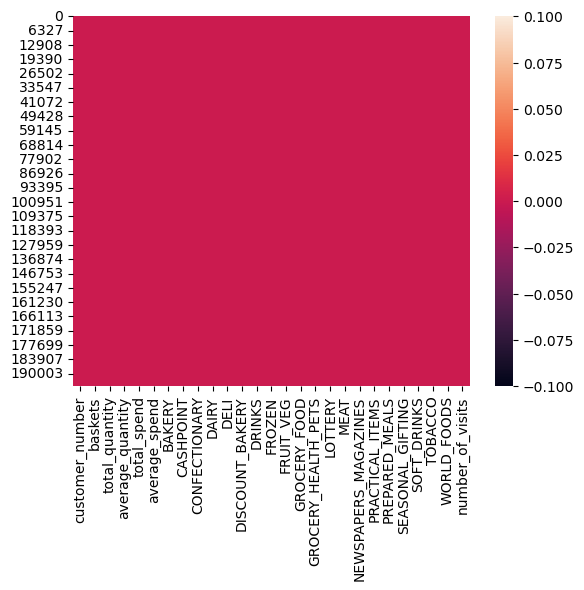

In [12]:
# checking for the null values
sns.heatmap(visit_df.isnull())

### Exploratory Data Analysis

In [13]:
visit_df.describe()

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,...,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS,number_of_visits
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8095.724333,65.182333,583.722000,11.273507,769.412937,14.801280,19.892510,23.563743,79.581263,94.408837,...,7.409633,35.772383,7.841553,1.694130,20.544407,6.352777,15.290923,62.580747,5.822933,65.182333
std,4686.259488,47.464717,405.006359,8.538024,552.769022,11.161387,28.355582,78.190956,112.109163,97.039937,...,29.478477,54.442189,13.392407,5.837355,32.192419,17.251581,30.603984,248.505264,16.890666,47.464717
min,14.000000,1.000000,6.000000,1.200000,7.280000,1.460000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4044.750000,32.000000,307.750000,6.117500,406.120000,8.037500,6.590000,0.000000,25.910000,38.197500,...,0.000000,5.987500,0.445000,0.000000,3.700000,0.000000,1.477500,0.000000,0.000000,32.000000
50%,8218.500000,53.000000,495.000000,8.730000,627.170000,11.770000,13.610000,0.000000,53.715000,70.355000,...,0.000000,18.730000,3.470000,0.000000,11.805000,0.890000,5.970000,0.000000,1.875000,53.000000
75%,12115.500000,86.000000,744.250000,13.390000,957.675000,17.440000,24.345000,10.000000,98.160000,120.445000,...,2.000000,44.440000,9.967500,1.520000,25.205000,5.372500,16.977500,34.905000,6.350000,86.000000
max,16316.000000,374.000000,4949.000000,90.750000,6588.650000,152.620000,473.440000,1924.680000,2671.340000,2390.030000,...,637.000000,882.580000,258.990000,195.560000,691.350000,347.720000,630.550000,6255.170000,609.680000,374.000000


In [14]:
visit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 195530
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       3000 non-null   int64  
 1   baskets               3000 non-null   int64  
 2   total_quantity        3000 non-null   int64  
 3   average_quantity      3000 non-null   float64
 4   total_spend           3000 non-null   float64
 5   average_spend         3000 non-null   float64
 6   BAKERY                3000 non-null   float64
 7   CASHPOINT             3000 non-null   float64
 8   CONFECTIONARY         3000 non-null   float64
 9   DAIRY                 3000 non-null   float64
 10  DELI                  3000 non-null   float64
 11  DISCOUNT_BAKERY       3000 non-null   float64
 12  DRINKS                3000 non-null   float64
 13  FROZEN                3000 non-null   float64
 14  FRUIT_VEG             3000 non-null   float64
 15  GROCERY_FOOD       

All the variables are numeric. We can therefore proceed with the exploring

We will first check for correlation matrix using seaborn

<AxesSubplot:>

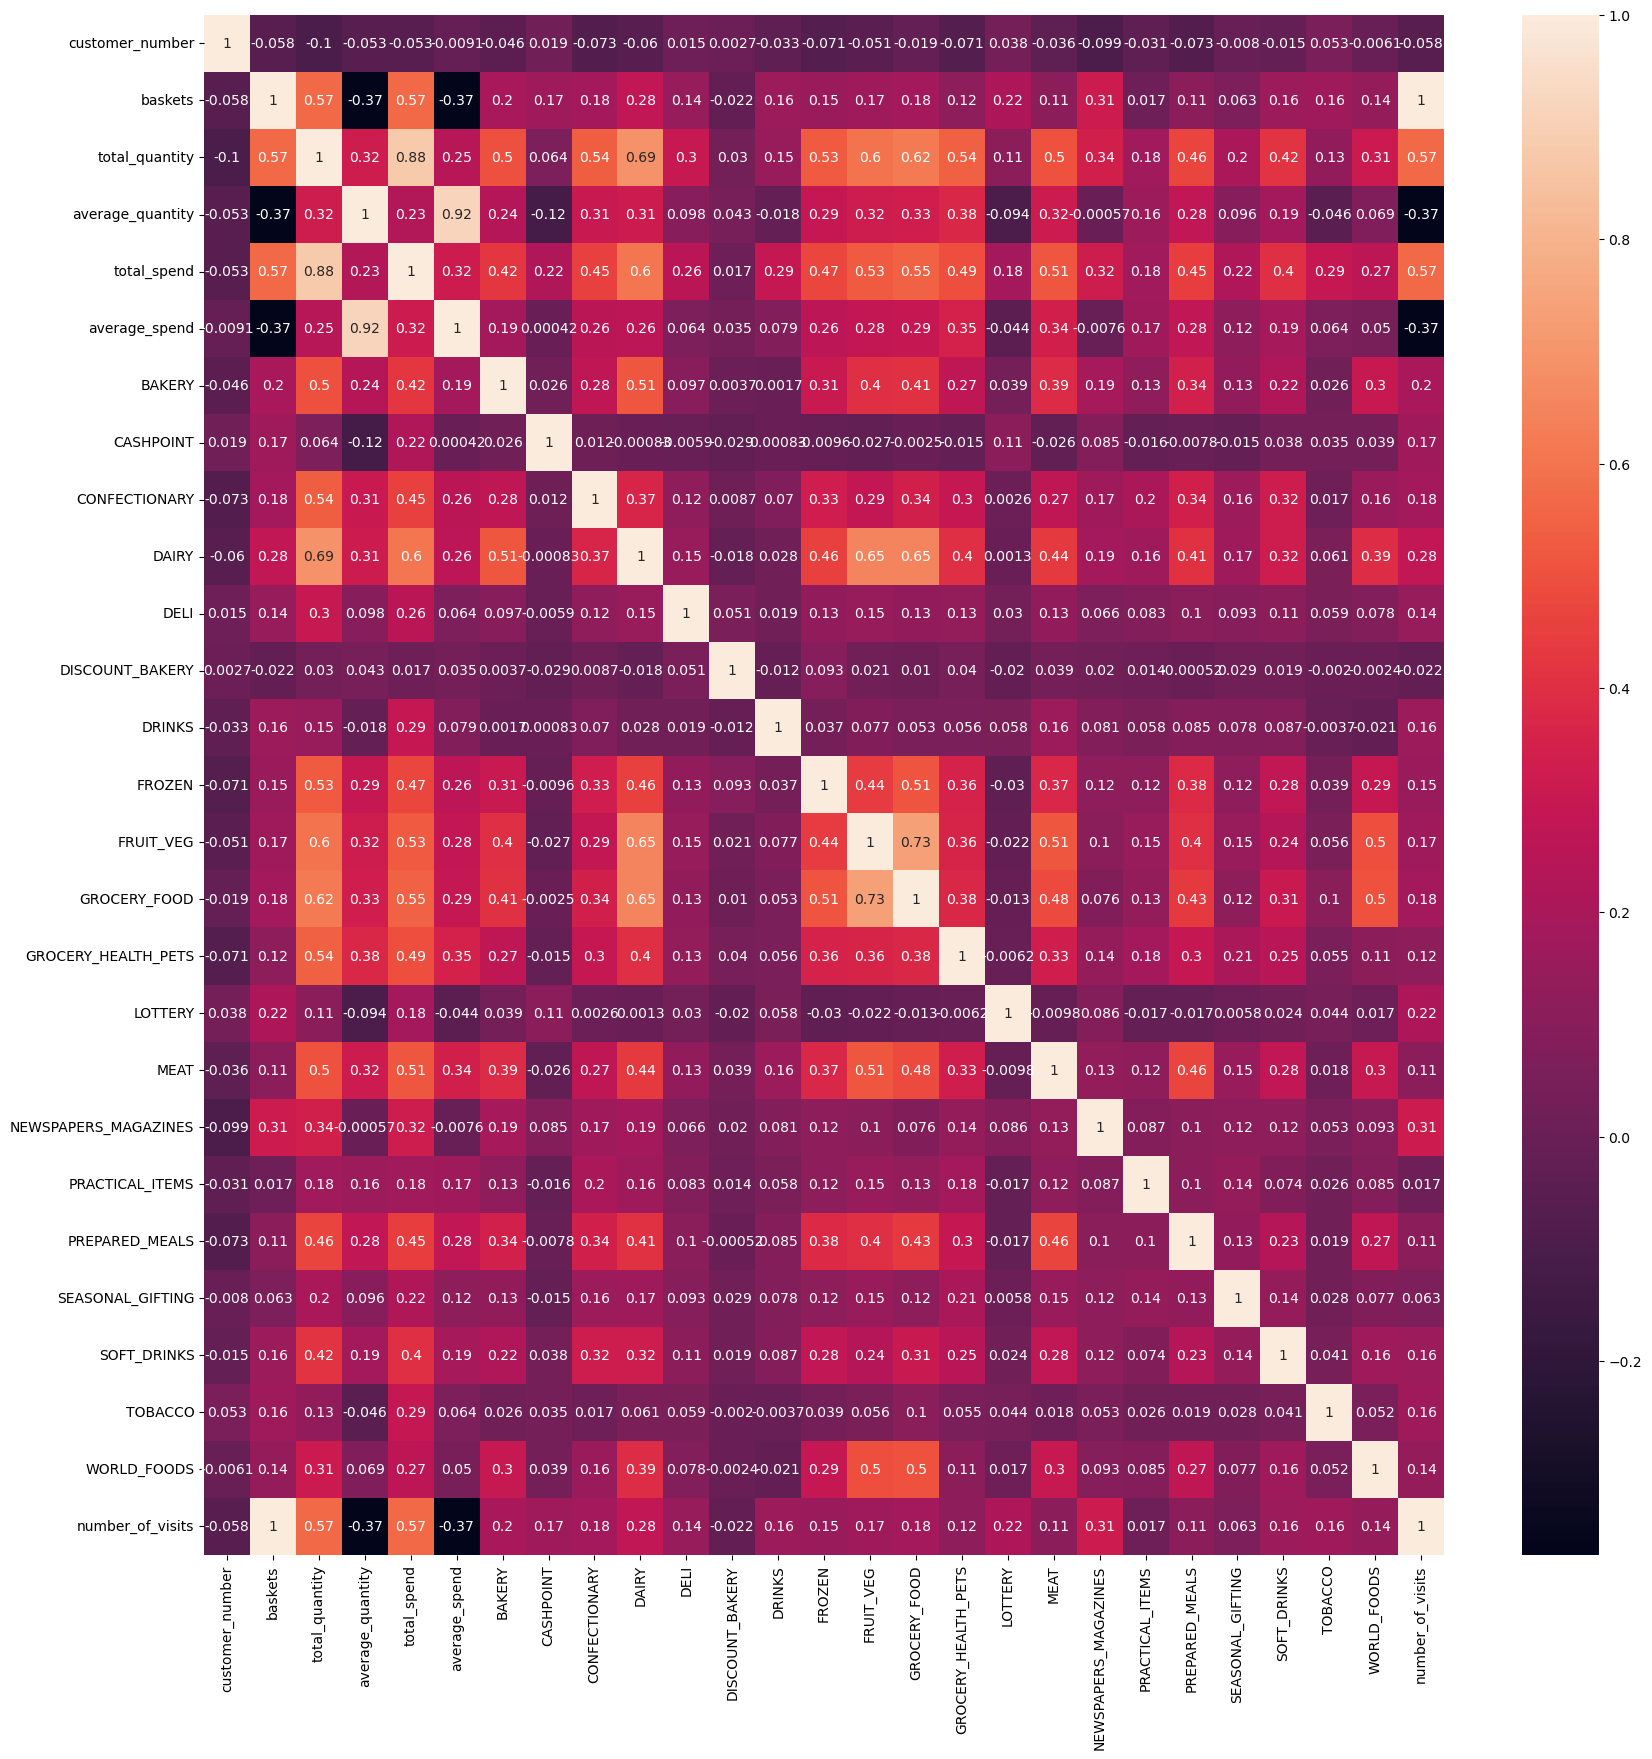

In [15]:
plt.figure(figsize = (20,20))
sns.heatmap(visit_df.corr(), annot=True)

In [16]:
visit_df

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,...,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS,number_of_visits
0,14,56,531,9.48,675.72,12.07,7.40,0.0,25.53,236.09,...,0.0,88.46,6.40,0.00,17.29,7.61,6.03,0.00,33.66,56
56,45,33,655,19.85,585.73,17.75,9.45,0.0,126.32,181.58,...,0.0,59.39,7.62,0.00,37.18,0.00,30.17,0.00,4.37,33
89,52,59,294,4.98,222.18,3.77,1.04,0.0,3.29,5.19,...,0.0,9.96,1.99,0.00,0.00,22.10,3.17,0.00,54.90,59
148,61,37,499,13.49,547.87,14.81,14.08,0.0,69.29,61.15,...,0.0,53.52,1.60,1.52,6.88,9.12,10.93,0.00,1.19,37
185,63,48,281,5.85,293.34,6.11,12.12,0.0,75.66,43.60,...,4.0,2.49,0.45,0.00,0.00,0.00,1.19,0.00,5.79,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195349,16295,54,322,5.96,679.70,12.59,5.97,100.0,52.25,42.28,...,0.0,0.00,1.99,0.00,2.09,0.00,8.21,147.69,0.00,54
195403,16301,42,268,6.38,251.43,5.99,5.11,0.0,110.13,23.19,...,4.0,0.00,7.30,0.00,0.00,6.46,16.96,0.00,4.48,42
195445,16303,56,331,5.91,354.32,6.33,14.77,0.0,13.00,38.81,...,38.0,0.00,5.40,0.00,7.12,0.00,5.88,0.00,13.10,56
195501,16306,29,300,10.34,462.81,15.96,10.54,0.0,3.27,34.85,...,0.0,0.00,0.00,0.00,10.56,0.00,11.22,0.00,0.45,29


Is there a correlation between baskets and the number of visits?

<AxesSubplot:xlabel='baskets', ylabel='number_of_visits'>

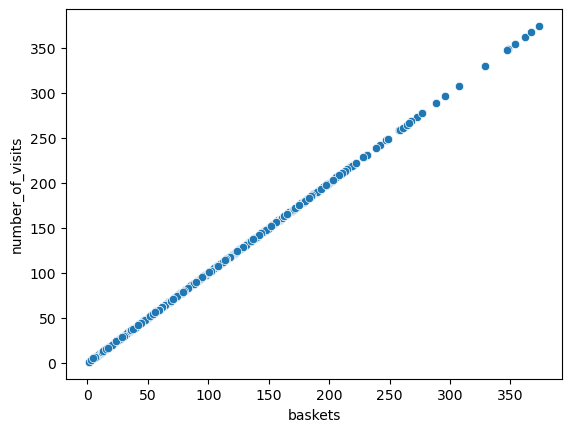

In [17]:
sns.scatterplot(data=visit_df, x='baskets', y='number_of_visits')

There is a perfect correlation, and it is linear. Therefore, we will choose the number of visits instead of the number of baskets

Is there a relationship between the average quantity and the number of visits? 

<AxesSubplot:xlabel='average_quantity', ylabel='number_of_visits'>

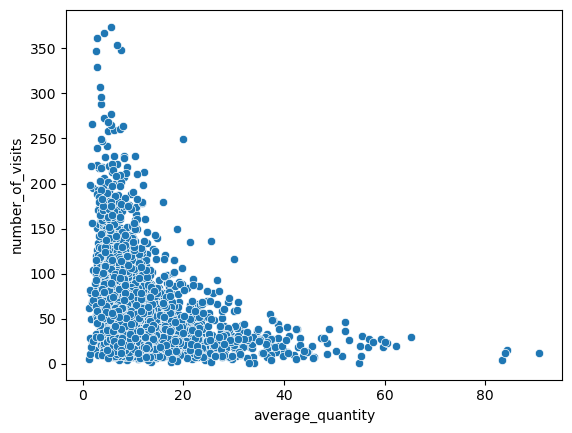

In [18]:
sns.scatterplot(data=visit_df, x='average_quantity', y='number_of_visits')

There appears to be customers who visit more but on average they buy less items. Does the number of visits have an impact on the total spent?

<AxesSubplot:xlabel='total_spend', ylabel='number_of_visits'>

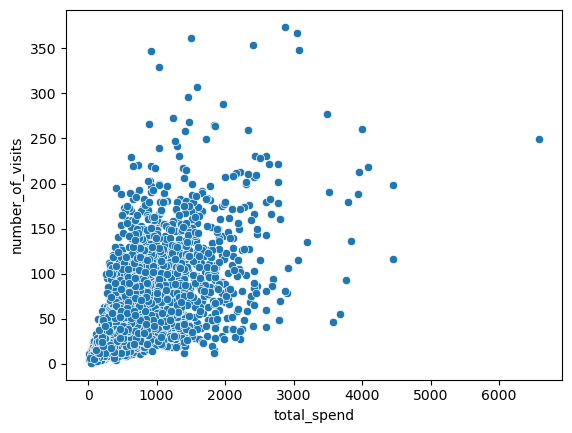

In [19]:
sns.scatterplot(data=visit_df, x='total_spend', y='number_of_visits')

There is a weak positive relationship between the total amount of money spent and the number of visits. This means that the more times customers visit the stores, the more the total money they spend, but it is not automatic

Text(0.5, 1.0, 'Frequency of Product Categories Purchased by Customers')

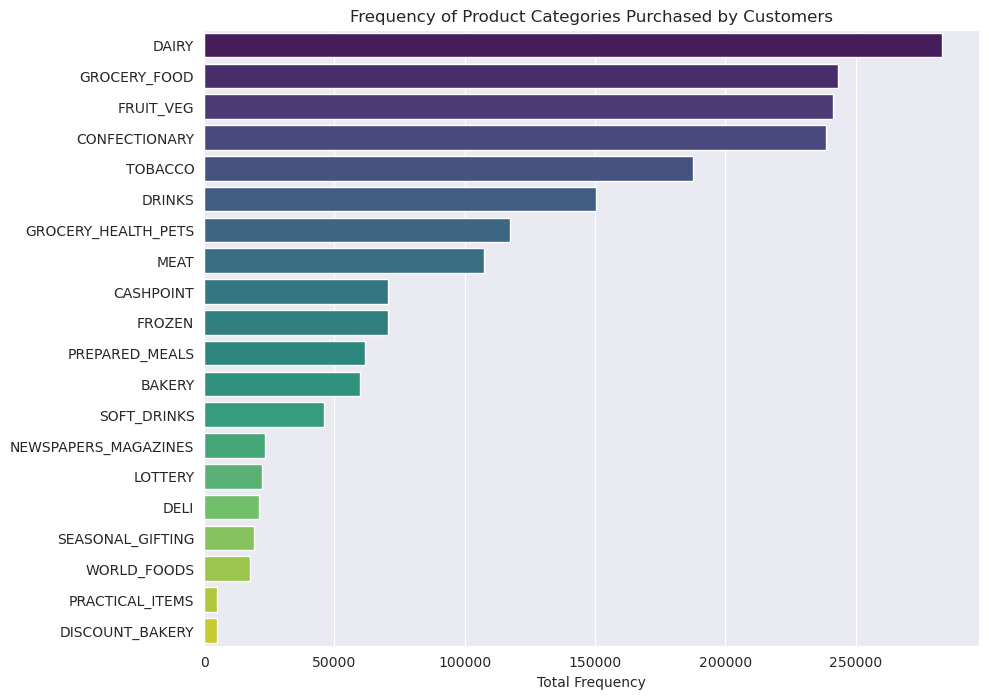

In [20]:
freq = visit_df[['BAKERY', 'CASHPOINT', 'CONFECTIONARY',
       'DAIRY', 'DELI', 'DISCOUNT_BAKERY', 'DRINKS', 'FROZEN', 'FRUIT_VEG',
       'GROCERY_FOOD', 'GROCERY_HEALTH_PETS', 'LOTTERY', 'MEAT',
       'NEWSPAPERS_MAGAZINES', 'PRACTICAL_ITEMS', 'PREPARED_MEALS',
       'SEASONAL_GIFTING', 'SOFT_DRINKS', 'TOBACCO', 'WORLD_FOODS']].sum().sort_values(ascending=False)
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.barplot(x=freq, y=freq.index, palette='viridis')
plt.xlabel('Total Frequency')
plt.title('Frequency of Product Categories Purchased by Customers')

From the barplot above, the most frequently purchased items are Dairy then Grocery, closely followed by fruit_veg and confectionaries

In [21]:
visit_df


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,...,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS,number_of_visits
0,14,56,531,9.48,675.72,12.07,7.40,0.0,25.53,236.09,...,0.0,88.46,6.40,0.00,17.29,7.61,6.03,0.00,33.66,56
56,45,33,655,19.85,585.73,17.75,9.45,0.0,126.32,181.58,...,0.0,59.39,7.62,0.00,37.18,0.00,30.17,0.00,4.37,33
89,52,59,294,4.98,222.18,3.77,1.04,0.0,3.29,5.19,...,0.0,9.96,1.99,0.00,0.00,22.10,3.17,0.00,54.90,59
148,61,37,499,13.49,547.87,14.81,14.08,0.0,69.29,61.15,...,0.0,53.52,1.60,1.52,6.88,9.12,10.93,0.00,1.19,37
185,63,48,281,5.85,293.34,6.11,12.12,0.0,75.66,43.60,...,4.0,2.49,0.45,0.00,0.00,0.00,1.19,0.00,5.79,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195349,16295,54,322,5.96,679.70,12.59,5.97,100.0,52.25,42.28,...,0.0,0.00,1.99,0.00,2.09,0.00,8.21,147.69,0.00,54
195403,16301,42,268,6.38,251.43,5.99,5.11,0.0,110.13,23.19,...,4.0,0.00,7.30,0.00,0.00,6.46,16.96,0.00,4.48,42
195445,16303,56,331,5.91,354.32,6.33,14.77,0.0,13.00,38.81,...,38.0,0.00,5.40,0.00,7.12,0.00,5.88,0.00,13.10,56
195501,16306,29,300,10.34,462.81,15.96,10.54,0.0,3.27,34.85,...,0.0,0.00,0.00,0.00,10.56,0.00,11.22,0.00,0.45,29


## Data Preprocessing and Feature Engineering


## Customer Segmentation
